## Final Project Submission

Please fill out:
* Student name: Cristina Townsend
* Student pace: part time 
* Scheduled project review date/time: Saturday 06/13/2020 at 4:00 pm
* Instructor name: James Irving
* Blog post URL: https://cristinamtown.github.io/


## Question I aim to answer:
1. Which types of movies have biggest box office gross profit?
2. Which types movies are most likely have people take Microsoft seriously as content creators?
4. Home release vs. theatrical release?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Inspecting Given BoxOffice Mojo Gross

In [2]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(df1.shape)
df1.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### Inspecting Given IMDb Data

In [4]:
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
print(df2.shape)
df2.head()

(606648, 6)


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [6]:
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
print(df3.shape)
df3.head()

(331703, 8)


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [8]:
df5 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
print(df5.shape)
df5.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
df6 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
print(df6.shape)
df6.head()

(146144, 3)


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [11]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [12]:
df7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
print(df7.shape)
df7.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### Inspecting gather IMDb Award data

In [14]:
df12 = pd.read_csv('zippedData/Oscar Nominations (2010-2019).csv', encoding='latin-1')
df12.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt5052448,2018-08-15,2018-08-15,NaN,Get Out,https://www.imdb.com/title/tt5052448/,movie,7.7,104,2017,"Horror, Mystery, Thriller",461375,2017-01-23,Jordan Peele
1,2,tt4925292,2018-08-15,2018-08-15,NaN,Lady Bird,https://www.imdb.com/title/tt4925292/,movie,7.4,94,2017,"Comedy, Drama",219570,2017-09-01,Greta Gerwig
2,3,tt5726616,2018-08-15,2018-08-15,NaN,Call Me by Your Name,https://www.imdb.com/title/tt5726616/,movie,7.9,132,2017,"Drama, Romance",192466,2017-01-22,Luca Guadagnino
3,4,tt5013056,2018-08-15,2018-08-15,NaN,Dunkirk,https://www.imdb.com/title/tt5013056/,movie,7.9,106,2017,"Action, Drama, History, Thriller, War",518990,2017-07-13,Christopher Nolan
4,5,tt5027774,2018-08-15,2018-08-15,NaN,"Three Billboards Outside Ebbing, Missouri",https://www.imdb.com/title/tt5027774/,movie,8.2,115,2017,"Comedy, Crime, Drama",400525,2017-09-04,Martin McDonagh


In [15]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 15 columns):
Position          516 non-null int64
Const             516 non-null object
Created           516 non-null object
Modified          516 non-null object
Description       0 non-null float64
Title             516 non-null object
URL               516 non-null object
Title Type        516 non-null object
IMDb Rating       516 non-null float64
Runtime (mins)    516 non-null int64
Year              516 non-null int64
Genres            516 non-null object
Num Votes         516 non-null int64
Release Date      515 non-null object
Directors         516 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 60.6+ KB


In [16]:
df13 = pd.read_csv('zippedData/Best Picture Nominees 2000-2009.csv', encoding='latin-1')
df13.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0499549,2011-05-03,2011-05-03,[b][purple]Golden Globe BP Winner - 2009[/purp...,Avatar,https://www.imdb.com/title/tt0499549/,movie,7.8,162,2009,"Action, Adventure, Fantasy, Sci-Fi",1093171,2009-12-10,James Cameron
1,2,tt0887912,2011-05-03,2011-05-03,[b][blue]Academy Award BP Winner - 2009[/blue]...,The Hurt Locker,https://www.imdb.com/title/tt0887912/,movie,7.6,131,2008,"Drama, Thriller, War",410397,2008-09-04,Kathryn Bigelow
2,3,tt0878804,2011-05-03,2011-05-03,[blue]Academy Award BP Nominee - 2009[/blue],The Blind Side,https://www.imdb.com/title/tt0878804/,movie,7.6,129,2009,"Biography, Drama, Sport",282332,2009-11-17,John Lee Hancock
3,4,tt1136608,2011-05-03,2011-05-03,[blue]Academy Award BP Nominee - 2009[/blue],District 9,https://www.imdb.com/title/tt1136608/,movie,7.9,112,2009,"Action, Sci-Fi, Thriller",626066,2009-08-13,Neill Blomkamp
4,5,tt1174732,2011-05-03,2011-05-03,[blue]Academy Award BP Nominee - 2009[/blue],An Education,https://www.imdb.com/title/tt1174732/,movie,7.3,100,2009,Drama,126083,2009-01-18,Lone Scherfig


In [17]:
df14 = pd.read_csv('zippedData/Best Picture Nominees (2010-2019).csv', encoding='latin-1')
df14.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt1542344,2013-12-13,2013-12-13,NaN,127 Hours,https://www.imdb.com/title/tt1542344/,movie,7.6,94,2010,"Biography, Drama",339125,2010-09-04,Danny Boyle
1,2,tt0947798,2013-12-13,2013-12-13,NaN,Black Swan,https://www.imdb.com/title/tt0947798/,movie,8.0,108,2010,"Drama, Thriller",680069,2010-09-01,Darren Aronofsky
2,3,tt0964517,2013-12-13,2013-12-13,NaN,The Fighter,https://www.imdb.com/title/tt0964517/,movie,7.8,116,2010,"Biography, Drama, Sport",330883,2010-12-06,David O. Russell
3,4,tt1375666,2013-12-13,2013-12-13,NaN,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",1969502,2010-07-08,Christopher Nolan
4,5,tt0842926,2013-12-13,2013-12-13,NaN,The Kids Are All Right,https://www.imdb.com/title/tt0842926/,movie,7.0,106,2010,"Comedy, Drama, Romance",123591,2010-01-25,Lisa Cholodenko


#### Inspecting Given Rotten Tomatoes Data

In [18]:
df8 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
print(df8.shape)
df8.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [19]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [20]:
df9 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
print(df9.shape)
df9.head()

(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [21]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Inspecting Given TMDb Data

In [22]:
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
print(df10.shape)
df10.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


#### Inspecting Given The Numbers Data

In [24]:
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(df11.shape)
df11.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Which types/genres of movies have the biggest box office gross profit?


#### See highest grossing movies with no other data

In [26]:
# Get box office data from the Numbers
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(df_tn.shape)
df_tn.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
# Remove commas and $ from worldwide_gross so we can change type to float
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',', '')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$', '')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(float)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [28]:
# Drop any film with worldwide_gross = 0, b/c it means wasn't released in theaters
df_tn = df_tn[df_tn.worldwide_gross != 0]


In [29]:
#Sort by total gross
df_tn_sort = df_tn.sort_values(by=['worldwide_gross'], ascending=False)
df_tn_sort.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1.648855e+09


In [30]:
df_tn_sort.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5383,84,"Dec 31, 2014",Destiny,"$750,000",$0,450.0
5518,19,"Oct 13, 2005",The Dark Hours,"$400,000",$423,423.0
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,"$10,000",$401,401.0
5335,36,"Nov 21, 2014",Food Chains,"$913,000",$0,176.0
5302,3,"Dec 11, 2015",American Hero,"$1,000,000",$0,26.0


In [31]:
# Graph 20 highest grossing movies
df_top20 = df_tn_sort[:20]
df_top20

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1.648855e+09
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1.518723e+09
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1.517936e+09
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1.348258e+09
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1.341693e+09


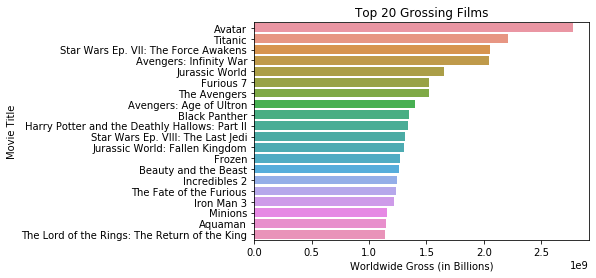

In [32]:
# plt.figure(figsize=(10,8))
# Make horizontal 
ax_top20 = sns.barplot(y='movie', x='worldwide_gross', orient='h', data=df_top20)
ax_top20.set_title('Top 20 Grossing Films')
# ax_top20.set_xticklabels(df_top20['movie']) #, rotation=45, ha='right')
ax_top20.set_ylabel('Movie Title')
ax_top20.set_xlabel('Worldwide Gross (in Billions)');

- Most of the top 20 are part of series, Disney, or from Director James Cameron.

#### Which genres of movies do best

In [33]:
# Get 
df_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
print(df_titles.shape)
df_titles.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [34]:
# Join df_tn and df_title on movie titles 
df_gross_genre = df_tn.merge(df_titles, left_on='movie', right_on='primary_title')
df_gross_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [35]:
df_gross_genre['genres']

0                         Horror
1       Action,Adventure,Fantasy
2        Action,Adventure,Sci-Fi
3        Action,Adventure,Sci-Fi
4        Action,Adventure,Sci-Fi
                  ...           
3440         Comedy,Drama,Horror
3441                       Drama
3442                         NaN
3443                         NaN
3444                Comedy,Drama
Name: genres, Length: 3445, dtype: object

In [36]:
test = df_gross_genre['genres'][1]
test

'Action,Adventure,Fantasy'

In [37]:
test.split(',')

['Action', 'Adventure', 'Fantasy']

In [38]:
#Check for null values 
df_gross_genre.isnull().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      435
genres                66
dtype: int64

In [39]:
# Fill the null values in genres so it can be split 
df_gross_genre['genres'] = df_gross_genre['genres'].fillna('No genre given')
df_gross_genre.isnull().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      435
genres                 0
dtype: int64

In [40]:
# Split genres column on ','
genres = df_gross_genre['genres'].str.split(',')
genres = list(genres)
genres

[['Horror'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Thriller'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Western'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Drama'],

In [41]:
# flattened genres into a list of unique values for genres 
genres_list = []
for sublist in genres:
    for i in sublist:
        genres_list.append(i)
genres_list = list(set(genres_list))
genres_list

['Mystery',
 'Animation',
 'Romance',
 'Biography',
 'Comedy',
 'Horror',
 'Sci-Fi',
 'Family',
 'Sport',
 'Thriller',
 'Western',
 'Documentary',
 'Music',
 'Adventure',
 'Action',
 'Drama',
 'Fantasy',
 'Musical',
 'No genre given',
 'History',
 'War',
 'News',
 'Crime']

In [42]:
len(genres_list)

23

In [43]:
df_gross_genre['genres'].str.contains("Action")

0       False
1        True
2        True
3        True
4        True
        ...  
3440    False
3441    False
3442    False
3443    False
3444    False
Name: genres, Length: 3445, dtype: bool

In [44]:
# Add boolian columns of genres in genres_list
for g in genres_list:
    df_gross_genre[g] = df_gross_genre['genres'].str.contains(g)
df_gross_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,...,Adventure,Action,Drama,Fantasy,Musical,No genre given,History,War,News,Crime
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,tt1775309,Avatar,Abatâ,2011,...,False,False,False,False,False,False,False,False,False,False
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,...,True,True,False,True,False,False,False,False,False,False
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,...,True,True,False,False,False,False,False,False,False,False
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,True,True,False,False,False,False,False,False,False,False
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,...,True,True,False,False,False,False,False,False,False,False


In [45]:
type(df_gross_genre[genres_list[0]][0])

numpy.bool_

In [46]:
genre_dict = {}
for genre in genres_list:
#     print(genre)
    try:
        temp = df_gross_genre.groupby(genre).get_group(True)['worldwide_gross']
        genre_dict[genre] = temp.reset_index()
    except:
        print(genre)
genre_dict

{'Mystery':      index  worldwide_gross
 0       76      259357408.0
 1      256      290650494.0
 2      278      402448265.0
 3      281      211856088.0
 4      283      261400000.0
 ..     ...              ...
 218   3394        1165996.0
 219   3417         429448.0
 220   3419       41656474.0
 221   3426           8555.0
 222   3437         489792.0
 
 [223 rows x 2 columns], 'Animation':      index  worldwide_gross
 0       11     5.864772e+08
 1       44     1.242521e+09
 2       46     1.021215e+09
 3       47     1.068880e+09
 4       53     7.435883e+08
 ..     ...              ...
 135   2744     4.182407e+07
 136   2745     2.127777e+07
 137   2747     2.127777e+07
 138   3048     1.392649e+06
 139   3179     1.849255e+08
 
 [140 rows x 2 columns], 'Romance':      index  worldwide_gross
 0       67     3.510404e+08
 1       68     2.653320e+07
 2      132     1.259200e+09
 3      135     6.084311e+08
 4      154     1.272470e+09
 ..     ...              ...
 340   3402   

In [47]:
# Examine genre_dict
genre_dict['Horror']['worldwide_gross'][:5]

0    2.776345e+09
1    5.315146e+08
2    5.295307e+08
3    7.980081e+08
4    2.382027e+08
Name: worldwide_gross, dtype: float64

In [48]:
# Create Dictionary without a Dataframe in it
genre_dict2 = {}
for genre in genres_list:
    genre_dict2[genre] = genre_dict[genre]['worldwide_gross']
genre_dict2['Action']

0      1.045664e+09
1      1.497624e+08
2      1.403014e+09
3      2.048134e+09
4      6.559452e+08
           ...     
649    4.445200e+04
650    1.000000e+07
651    3.934450e+06
652    1.577585e+06
653    3.209200e+04
Name: worldwide_gross, Length: 654, dtype: float64

In [49]:
# Create a DataFrame of genre_dict2 for a boxplot
df_box = pd.DataFrame.from_dict(genre_dict2)
df_box.head()

,Mystery,Animation,Romance,Biography,Comedy,Horror,Sci-Fi,Family,Sport,Thriller,...,Adventure,Action,Drama,Fantasy,Musical,No genre given,History,War,News,Crime
0,259357408.0,5.864772e+08,3.510404e+08,854235992.0,5.864772e+08,2.776345e+09,1.497624e+08,1.017004e+09,8.211334e+08,8.796209e+08,...,1.045664e+09,1.045664e+09,322459006.0,1.045664e+09,1.025491e+09,322459006.0,322459006.0,385997896.0,163018913.0,1.234846e+09
1,290650494.0,1.242521e+09,2.653320e+07,532938302.0,6.542135e+08,5.315146e+08,1.403014e+09,2.208208e+09,1.272470e+09,1.084439e+09,...,1.497624e+08,1.497624e+08,322459006.0,6.559452e+08,1.259200e+09,84747441.0,84747441.0,44793168.0,15716828.0,1.518723e+09
2,402448265.0,1.021215e+09,1.259200e+09,385997896.0,1.021215e+09,5.295307e+08,2.048134e+09,1.025491e+09,8.768397e+07,1.234846e+09,...,1.403014e+09,1.403014e+09,84747441.0,3.931513e+08,1.259200e+09,854235992.0,854235992.0,330780051.0,98230839.0,8.542360e+08
3,211856088.0,1.068880e+09,6.084311e+08,385997896.0,1.068880e+09,7.980081e+08,2.827781e+08,4.903591e+08,1.267046e+08,3.224590e+08,...,2.048134e+09,2.048134e+09,84747441.0,8.675003e+08,6.084311e+08,854235992.0,122603824.0,210315681.0,62831715.0,6.301635e+08
4,261400000.0,7.435883e+08,1.272470e+09,44793168.0,7.435883e+08,2.382027e+08,1.140069e+09,6.522201e+08,8.353196e+07,8.474744e+07,...,6.559452e+08,6.559452e+08,351040419.0,1.017004e+09,6.084311e+08,798008101.0,499837368.0,156815529.0,12394562.0,5.356634e+08


In [50]:
# Test before creating a dict of sums
test = genre_dict['War'].sum()['worldwide_gross']
test

2825571293.0

In [51]:
# Create a dict of sum of the Worldwide Gross to see which genre have made the most overall
wwg_sum = {}
for genre in genres_list:
    wwg_sum[genre] = genre_dict[genre].sum()['worldwide_gross']
wwg_sum

{'Mystery': 17035792756.0,
 'Animation': 44369274383.0,
 'Romance': 22187236632.0,
 'Biography': 16966697195.0,
 'Comedy': 86146214279.0,
 'Horror': 26107395474.0,
 'Sci-Fi': 50990758281.0,
 'Family': 31819192685.0,
 'Sport': 5221478607.0,
 'Thriller': 45325370571.0,
 'Western': 1494721290.0,
 'Documentary': 31585602722.0,
 'Music': 13316389423.0,
 'Adventure': 138334162940.0,
 'Action': 125098855004.0,
 'Drama': 107762106889.0,
 'Fantasy': 43607449439.0,
 'Musical': 7774319945.0,
 'No genre given': 6935392684.0,
 'History': 7065495194.0,
 'War': 2825571293.0,
 'News': 399407373.0,
 'Crime': 25501138686.0}

In [52]:
# Create a DF of it
df_wwg = pd.DataFrame(wwg_sum.items(), columns=['genre', 'worldwide_gross'])
df_wwg.head()

,genre,worldwide_gross
0,Mystery,1.703579e+10
1,Animation,4.436927e+10
2,Romance,2.218724e+10
3,Biography,1.696670e+10
4,Comedy,8.614621e+10


In [53]:
# Sort gross largest to smallest
df_wwg.sort_values('worldwide_gross', ascending=False, inplace=True)
df_wwg.head()

,genre,worldwide_gross
13,Adventure,1.383342e+11
14,Action,1.250989e+11
15,Drama,1.077621e+11
4,Comedy,8.614621e+10
6,Sci-Fi,5.099076e+10


In [54]:
# Create a dict of the average made per genre
wwg_mean = {}
for genre in genres_list:
    wwg_mean[genre] = genre_dict[genre].mean()['worldwide_gross']
wwg_mean

{'Mystery': 76393689.48878923,
 'Animation': 316923388.45,
 'Romance': 64310830.817391306,
 'Biography': 72507252.97008547,
 'Comedy': 111300018.44832042,
 'Horror': 75021251.36206897,
 'Sci-Fi': 246332165.60869566,
 'Family': 171995636.13513514,
 'Sport': 73541952.2112676,
 'Thriller': 87839865.44767442,
 'Western': 67941876.81818181,
 'Documentary': 71622681.90929705,
 'Music': 121058085.66363636,
 'Adventure': 300726441.17391306,
 'Action': 191282652.911315,
 'Drama': 64956062.01868595,
 'Fantasy': 227122132.49479166,
 'Musical': 250784514.3548387,
 'No genre given': 105081707.33333333,
 'History': 78505502.15555556,
 'War': 56511425.86,
 'News': 57058196.14285714,
 'Crime': 70445134.4917127}

In [55]:
# Create a DF of it
df_mean = pd.DataFrame(wwg_mean.items(), columns=['genre', 'worldwide_gross'])
df_mean.head()

,genre,worldwide_gross
0,Mystery,7.639369e+07
1,Animation,3.169234e+08
2,Romance,6.431083e+07
3,Biography,7.250725e+07
4,Comedy,1.113000e+08


In [56]:
# Sort gross largest to smallest
df_mean.sort_values('worldwide_gross', ascending=False, inplace=True)
df_mean.head()

,genre,worldwide_gross
1,Animation,3.169234e+08
13,Adventure,3.007264e+08
17,Musical,2.507845e+08
6,Sci-Fi,2.463322e+08
16,Fantasy,2.271221e+08


Text(0.5, 0, 'Genres')

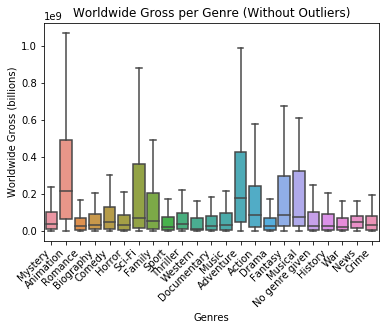

In [57]:
# Boxplot for genre in genre_list
ax_box = sns.boxplot(data=df_box, showfliers=False)
ax_box.set_title('Worldwide Gross per Genre (Without Outliers)')
ax_box.set_xticklabels(df_box, rotation=45, ha='right')
ax_box.set_ylabel('Worldwide Gross (billions)')
ax_box.set_xlabel('Genres')


Text(0.5, 0, 'Genres')

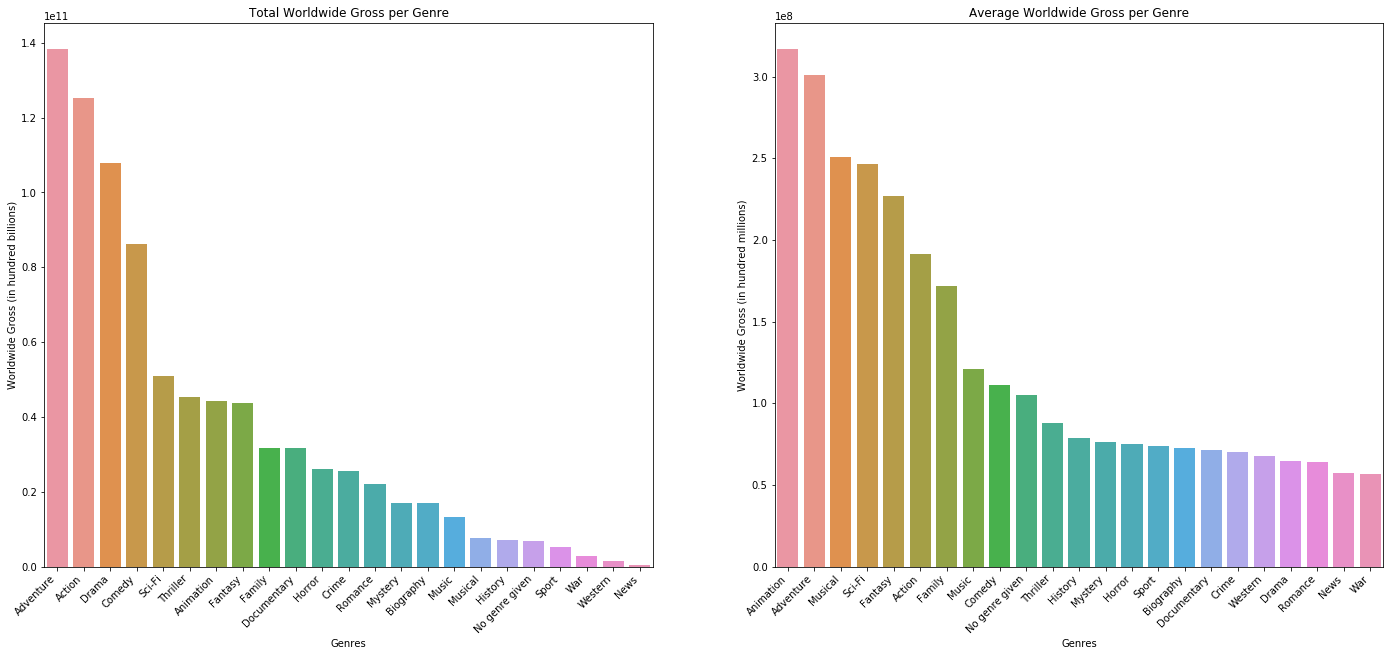

In [58]:
# Create graph to show which genres gross more in the box office
fig, axs = plt.subplots(figsize=(24,10), ncols=2)


# Total WorldWide Gross in barplot
ax_genre = sns.barplot(y='worldwide_gross', x='genre', data=df_wwg, ax=axs[0])
ax_genre.set_title('Total Worldwide Gross per Genre')
ax_genre.set_xticklabels(df_wwg['genre'], rotation=45, ha='right')
ax_genre.set_ylabel('Worldwide Gross (in hundred billions)')
ax_genre.set_xlabel('Genres')

# Mean Worldwide Gross
ax_mean = sns.barplot(y='worldwide_gross', x='genre', data=df_mean, ax=axs[1])
ax_mean.set_title('Average Worldwide Gross per Genre')
ax_mean.set_xticklabels(df_mean['genre'], rotation=45, ha='right'),
ax_mean.set_ylabel('Worldwide Gross (in hundred millions)')
ax_mean.set_xlabel('Genres')

#### Interpetation:
- If we look at the top grossing movies are ones from series or properties that already have a large dedicated fan base. It is unlikely a company will loan a profitable property to Microsoft when many of the companies that own the rights have their own studios.

- Get taken seriously as a Production and Distribution company so Microsoft can:
 - Create their own nostalgia creating, money-making series. Plant the seeds to reap in 5 to 10 years.
 - Find the next "Harry Potter," "Lord of the Rings"
 - Find the next big directors.

- If we look at the top grossing genres, it seems Adventure, Action, Drama, Animation, and Comedy movies do the best in the box office. This fits with finding the next big series.

### Which types of movies are most likely to have people take Microsoft seriously as content creators?



#### Look at Rating from TMDb vs genre


In [59]:
# Import rating data from tmdb
df_rating = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
print(df_rating.shape)
df_rating.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [60]:
# Drop rows with less than 500 votes to weed out movies seen by 1 person rating it a 10
df_ratings = df_rating[df_rating['vote_count']>500]
df_ratings.sort_values(by='vote_count').head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23852,"[28, 80, 53]",446807,en,The Girl in the Spider's Web,26.425,2018-11-09,The Girl in the Spider's Web,6.0,501
2518,[53],8978,en,Assault on Precinct 13,14.525,2005-01-19,Assault on Precinct 13,6.1,501
84,"[12, 14, 16, 878]",37933,ja,ゲド戦記,12.005,2010-08-13,Tales from Earthsea,6.6,502
11270,"[27, 9648, 53]",297608,en,The Taking of Deborah Logan,8.332,2014-10-21,The Taking of Deborah Logan,6.0,502
11271,[18],249660,en,God's Not Dead,8.327,2014-03-21,God's Not Dead,6.1,503


In [61]:
df_rate_sort = df_ratings.sort_values(by='vote_average', ascending=False)
df_rate_sort.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
17389,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161
20632,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161
20626,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
14173,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
23861,"[18, 36, 10752]",424,en,Schindler's List,25.334,1993-12-15,Schindler's List,8.5,8065


In [62]:
# Find and drop duplicates
df_rate_sort.duplicated()

17389    False
20632     True
20626    False
14173     True
23861    False
         ...  
2585     False
23932    False
11094    False
8170     False
24230    False
Length: 1687, dtype: bool

In [63]:
df_rate_sort = df_rate_sort.drop_duplicates(['id'], keep='first')
df_rate_sort.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
17389,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161
20626,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
23861,"[18, 36, 10752]",424,en,Schindler's List,25.334,1993-12-15,Schindler's List,8.5,8065
5201,"[18, 80]",311,en,Once Upon a Time in America,17.717,1984-06-01,Once Upon a Time in America,8.4,2243
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048


In [64]:
# Combine with genres
df_rate_genre = df_rate_sort.merge(df_titles, left_on='title', right_on='primary_title')
df_rate_genre.head(3)

,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,original_title_y,start_year,runtime_minutes,genres
0,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161,tt5311514,Your Name.,Kimi no na wa.,2016,106.0,"Animation,Drama,Fantasy"
1,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation"
2,"[18, 10402]",244786,en,Whiplash,28.784,2014-10-10,Whiplash,8.4,7908,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music"


In [65]:
# Add boolian columns of 
for g in genres_list:
    df_rate_genre[g] = df_rate_genre['genres'].str.contains(g)
df_rate_genre.head()

,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,tconst,...,Adventure,Action,Drama,Fantasy,Musical,No genre given,History,War,News,Crime
0,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161,tt5311514,...,False,False,True,True,False,False,False,False,False,False
1,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,tt4633694,...,True,True,False,False,False,False,False,False,False,False
2,"[18, 10402]",244786,en,Whiplash,28.784,2014-10-10,Whiplash,8.4,7908,tt2582802,...,False,False,True,False,False,False,False,False,False,False
3,[18],265177,en,Mommy,11.095,2014-08-29,Mommy,8.3,1399,tt3612616,...,False,False,True,False,False,False,False,False,False,False
4,[18],265177,en,Mommy,11.095,2014-08-29,Mommy,8.3,1399,tt5152894,...,False,False,True,False,False,False,False,False,False,False


In [66]:
# Drop 'no genre given' to avoid error in boxplot
df_rate_genre.drop('No genre given', axis=1, inplace=True)

In [67]:
df_rate_genre.columns

Index(['genre_ids', 'id', 'original_language', 'original_title_x',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'tconst', 'primary_title', 'original_title_y', 'start_year',
       'runtime_minutes', 'genres', 'Mystery', 'Animation', 'Romance',
       'Biography', 'Comedy', 'Horror', 'Sci-Fi', 'Family', 'Sport',
       'Thriller', 'Western', 'Documentary', 'Music', 'Adventure', 'Action',
       'Drama', 'Fantasy', 'Musical', 'History', 'War', 'News', 'Crime'],
      dtype='object')

In [68]:
# Create a dictionary with the genres their ratings
genre_dict_rate = {}
for genre in genres_list:
#     print(genre)
    try:
        temp = df_rate_genre.groupby(genre).get_group(True)['vote_average']
        genre_dict_rate[genre] = temp.reset_index()
    except:
        print(genre)
genre_dict_rate

No genre given


{'Mystery':      index  vote_average
 0        7           8.3
 1       32           8.1
 2       37           8.1
 3       47           8.0
 4       83           7.9
 ..     ...           ...
 158   1967           4.9
 159   1968           4.8
 160   1975           4.7
 161   1989           4.0
 162   1991           4.0
 
 [163 rows x 2 columns], 'Animation':      index  vote_average
 0        0           8.6
 1        1           8.4
 2        6           8.3
 3       15           8.2
 4       18           8.2
 ..     ...           ...
 114   1804           5.6
 115   1807           5.6
 116   1830           5.6
 117   1840           5.5
 118   1893           5.4
 
 [119 rows x 2 columns], 'Romance':      index  vote_average
 0        5           8.3
 1        6           8.3
 2        7           8.3
 3       10           8.3
 4       23           8.2
 ..     ...           ...
 238   1908           5.3
 239   1911           5.3
 240   1921           5.3
 241   1929           5.2
 24

In [69]:
# Create Dictionary without a Dataframe in it
genre_dict_rate2 = {}
for genre in genres_list:
    try:
        genre_dict_rate2[genre] = genre_dict_rate[genre]['vote_average']
    except:
        print(genre)
genre_dict_rate2['Action']

No genre given


0      8.4
1      8.3
2      8.3
3      8.1
4      8.0
      ... 
494    4.6
495    4.5
496    4.5
497    4.4
498    4.0
Name: vote_average, Length: 499, dtype: float64

In [70]:
# Create a DataFrame of genre_rate_dict2 for a boxplot
df_rate_box = pd.DataFrame.from_dict(genre_dict_rate2)
df_rate_box.head()

,Mystery,Animation,Romance,Biography,Comedy,Horror,Sci-Fi,Family,Sport,Thriller,...,Music,Adventure,Action,Drama,Fantasy,Musical,History,War,News,Crime
0,8.3,8.6,8.3,8.3,8.3,8.3,8.3,8.2,7.8,8.3,...,8.4,8.4,8.4,8.6,8.6,8.0,8.1,8.1,7.7,8.2
1,8.1,8.4,8.3,8.2,8.2,8.2,8.3,8.2,7.4,8.1,...,8.1,8.3,8.3,8.4,8.1,7.7,8.0,7.8,6.5,8.2
2,8.1,8.3,8.3,8.2,8.2,8.0,8.2,8.0,7.4,8.1,...,8.0,8.3,8.3,8.3,7.9,7.7,8.0,7.6,4.9,8.2
3,8.0,8.2,8.3,8.1,8.2,8.0,7.9,7.9,7.4,8.1,...,8.0,8.2,8.1,8.3,7.7,6.9,7.9,7.6,NaN,8.0
4,7.9,8.2,8.2,8.1,8.1,8.0,7.8,7.9,7.3,8.0,...,7.9,8.2,8.0,8.3,7.7,6.9,7.8,7.5,NaN,8.0


In [71]:
# Create a dict of the average vote per genre
rate_mean = {}
for genre in genres_list:
    try:
        rate_mean[genre] = genre_dict_rate[genre].mean()['vote_average']
    except:
        print(genre)
rate_mean

No genre given


{'Mystery': 6.3975460122699355,
 'Animation': 6.823529411764705,
 'Romance': 6.639094650205763,
 'Biography': 6.940875912408761,
 'Comedy': 6.432761904761894,
 'Horror': 6.085062240663898,
 'Sci-Fi': 6.465030674846624,
 'Family': 6.6477272727272725,
 'Sport': 6.855555555555553,
 'Thriller': 6.3590116279069795,
 'Western': 6.316666666666666,
 'Documentary': 6.612820512820517,
 'Music': 6.889473684210525,
 'Adventure': 6.459173126614984,
 'Action': 6.358717434869741,
 'Drama': 6.6840292275574065,
 'Fantasy': 6.26300578034682,
 'Musical': 6.852631578947366,
 'History': 6.908064516129033,
 'War': 6.88695652173913,
 'News': 6.366666666666667,
 'Crime': 6.492395437262356}

In [72]:
# Create a DF of it
df_rate_mean = pd.DataFrame(rate_mean.items(), columns=['genre', 'vote_average'])


# Sort gross largest to smallest
df_rate_mean.sort_values('vote_average', ascending=False, inplace=True)
df_rate_mean.head()

,genre,vote_average
3,Biography,6.940876
18,History,6.908065
12,Music,6.889474
19,War,6.886957
8,Sport,6.855556


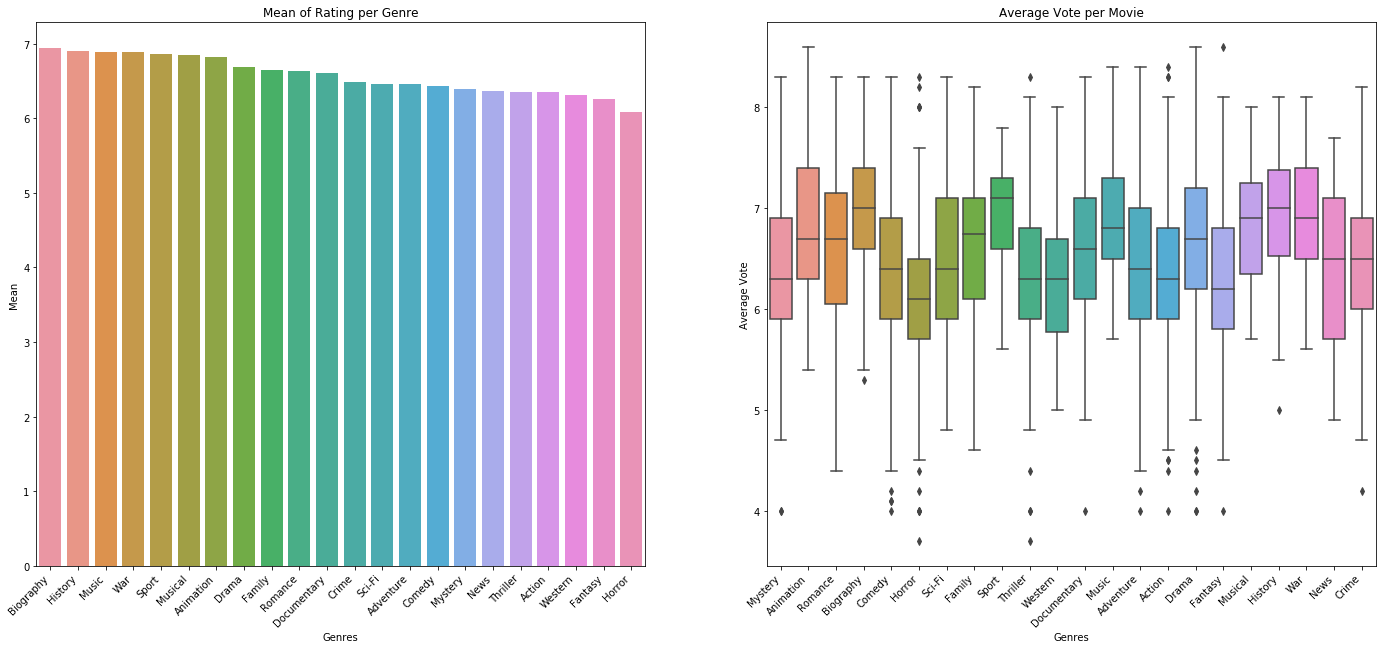

In [73]:
# Graph genres vs rating

# Create graph to show which genres gross more in the box office
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

# Mean of Average votes per genre
ax_rate = sns.barplot(y='vote_average', x='genre', data=df_rate_mean, ax=axs[0])
ax_rate.set_title('Mean of Rating per Genre')
ax_rate.set_xticklabels(df_rate_mean['genre'], rotation=45, ha='right')
ax_rate.set_ylabel('Mean')
ax_rate.set_xlabel('Genres')

# Box Plot of Average Vote per genre
ax_box_rate = sns.boxplot(data=df_rate_box, ax=axs[1])
ax_box_rate.set_title('Average Vote per Movie')
ax_box_rate.set_xticklabels(df_rate_box, rotation=45, ha='right')
ax_box_rate.set_ylabel('Average Vote')
ax_box_rate.set_xlabel('Genres');

#### Look at the Best Picture Nominees from the last 10 years

In [74]:
# Look at best picture nominee from the last 10/20 years
df_bp2010s = pd.read_csv('zippedData/Best Picture Nominees (2010-2019).csv', 
                         encoding='latin-1')
df_bp2010s.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt1542344,2013-12-13,2013-12-13,NaN,127 Hours,https://www.imdb.com/title/tt1542344/,movie,7.6,94,2010,"Biography, Drama",339125,2010-09-04,Danny Boyle
1,2,tt0947798,2013-12-13,2013-12-13,NaN,Black Swan,https://www.imdb.com/title/tt0947798/,movie,8.0,108,2010,"Drama, Thriller",680069,2010-09-01,Darren Aronofsky
2,3,tt0964517,2013-12-13,2013-12-13,NaN,The Fighter,https://www.imdb.com/title/tt0964517/,movie,7.8,116,2010,"Biography, Drama, Sport",330883,2010-12-06,David O. Russell
3,4,tt1375666,2013-12-13,2013-12-13,NaN,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",1969502,2010-07-08,Christopher Nolan
4,5,tt0842926,2013-12-13,2013-12-13,NaN,The Kids Are All Right,https://www.imdb.com/title/tt0842926/,movie,7.0,106,2010,"Comedy, Drama, Romance",123591,2010-01-25,Lisa Cholodenko


In [75]:
# Drop Columns that we will not be using and clutter the DF
df_bp2010s.drop(['Description', 'Created', 'Modified'], axis =1, inplace=True)

In [76]:
df_bp2010s.head()

,Position,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt1542344,127 Hours,https://www.imdb.com/title/tt1542344/,movie,7.6,94,2010,"Biography, Drama",339125,2010-09-04,Danny Boyle
1,2,tt0947798,Black Swan,https://www.imdb.com/title/tt0947798/,movie,8.0,108,2010,"Drama, Thriller",680069,2010-09-01,Darren Aronofsky
2,3,tt0964517,The Fighter,https://www.imdb.com/title/tt0964517/,movie,7.8,116,2010,"Biography, Drama, Sport",330883,2010-12-06,David O. Russell
3,4,tt1375666,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",1969502,2010-07-08,Christopher Nolan
4,5,tt0842926,The Kids Are All Right,https://www.imdb.com/title/tt0842926/,movie,7.0,106,2010,"Comedy, Drama, Romance",123591,2010-01-25,Lisa Cholodenko


In [77]:
df_bp2010s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
Position          88 non-null int64
Const             88 non-null object
Title             88 non-null object
URL               88 non-null object
Title Type        88 non-null object
IMDb Rating       88 non-null float64
Runtime (mins)    88 non-null int64
Year              88 non-null int64
Genres            88 non-null object
Num Votes         88 non-null int64
Release Date      88 non-null object
Directors         88 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 8.4+ KB


In [78]:
# df = df.groupby('domain')['ID'].nunique()
df_bp2010s.groupby('Directors')['Title'].nunique()

Directors
Adam McKay               2
Alejandro G. Iñárritu    2
Alexander Payne          2
Alfonso Cuarón           2
Ang Lee                  1
                        ..
Tom Hooper               2
Tom McCarthy             1
Wes Anderson             1
Woody Allen              1
Yorgos Lanthimos         1
Name: Title, Length: 72, dtype: int64

In [79]:
# Create a list of genres in df_bp2010s

#Split at the comma
genres_bp = df_bp2010s['Genres'].str.split(',')
genres_bp = list(genres_bp)

#Create a list of all genres
genres_list_bp = []
for sublist in genres_bp:
    for i in sublist:
        genres_list_bp.append(i)
        
# Remove the space before any genre in the list        
genres_list_bp = [genre.strip(' ') for genre in genres_list_bp]

In [80]:
# Create a list of the set to remove any duplicates
genres_list_bp = list(set(genres_list_bp))
genres_list_bp

['Mystery',
 'Family',
 'Action',
 'Animation',
 'Musical',
 'Sport',
 'Thriller',
 'Romance',
 'History',
 'Biography',
 'Comedy',
 'Western',
 'War',
 'Crime',
 'Music',
 'Drama',
 'Horror',
 'Sci-Fi',
 'Adventure',
 'Fantasy']

In [81]:
# Add a boolean column of genres if 'Genres' contains the genre
for g in genres_list_bp:
    df_bp2010s[g] = df_bp2010s['Genres'].str.contains(g)
df_bp2010s.head(2)


,Position,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,...,Comedy,Western,War,Crime,Music,Drama,Horror,Sci-Fi,Adventure,Fantasy
0,1,tt1542344,127 Hours,https://www.imdb.com/title/tt1542344/,movie,7.6,94,2010,"Biography, Drama",339125,...,False,False,False,False,False,True,False,False,False,False
1,2,tt0947798,Black Swan,https://www.imdb.com/title/tt0947798/,movie,8.0,108,2010,"Drama, Thriller",680069,...,False,False,False,False,False,True,False,False,False,False


In [82]:
# Test .sum()
df_bp2010s['Western'].sum()

4

In [83]:
count_bp = {}
for genre in genres_list_bp:
    temp = df_bp2010s[genre].sum()
    count_bp[genre] = temp
count_bp

{'Mystery': 5,
 'Family': 3,
 'Action': 9,
 'Animation': 1,
 'Musical': 2,
 'Sport': 3,
 'Thriller': 19,
 'Romance': 16,
 'History': 16,
 'Biography': 31,
 'Comedy': 21,
 'Western': 4,
 'War': 11,
 'Crime': 10,
 'Music': 6,
 'Drama': 81,
 'Horror': 1,
 'Sci-Fi': 7,
 'Adventure': 13,
 'Fantasy': 7}

In [84]:
# # Create a dict of the genres
# genre_dict_bp = {}
# for genre in genres_list_bp:
# #     print(genre)
#     try:
#         temp = df_bp2010s.groupby(genre).get_group(True)['Title']
#         genre_dict_bp[genre] = temp.reset_index()
#     except:
#         print(genre)
# genre_dict_bp

In [85]:
# Create Dataframe in it
# genre_dict_bp2 = {}
# for genre in genres_list_bp:
#     genre_dict_bp2[genre] = genre_dict_bp[genre]['Title']


df_count_bp = pd.DataFrame(count_bp, index=[0])
df_count_bp.head()

,Mystery,Family,Action,Animation,Musical,Sport,Thriller,Romance,History,Biography,Comedy,Western,War,Crime,Music,Drama,Horror,Sci-Fi,Adventure,Fantasy
0,5,3,9,1,2,3,19,16,16,31,21,4,11,10,6,81,1,7,13,7


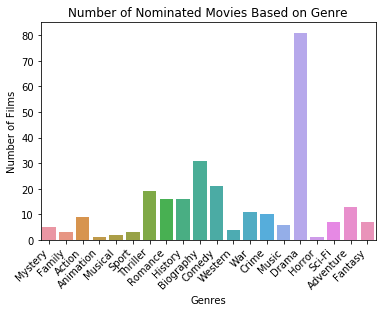

In [86]:
# Graph the genre count of Best Picture Nominee of the last 10 years
ax_bp = sns.barplot(data=df_count_bp)
ax_bp.set_title('Number of Nominated Movies Based on Genre')
ax_bp.set_xticklabels(df_count_bp, rotation=45, ha='right')
ax_bp.set_ylabel('Number of Films')
ax_bp.set_xlabel('Genres');

#### Interpetations
- Looking at the average votes, the genre doesn't make much as a difference, so the quality of movie does not depend on genre.
- Looking at Best Picture Nominees, Dramas are overwhelming nomiated. Biographical Drama would seem to have the highest chance of being nominated.

### Home release vs Theater release?


In [87]:
# Look at tickets sales through the years from theNumbers.com

In [88]:
import requests
from bs4 import BeautifulSoup


In [89]:
# Create a Response from requests. 
url = 'https://www.the-numbers.com/market/'

# Call the url and scrape the desired table
r = requests.get(url)
if not r.ok:
    print('Failed to get a response.')

soup = BeautifulSoup(r.content)

page_chart = soup.findAll('table')[0]


In [90]:
# Check it scraped properly and the correct infomation
page_chart


<table>
<tr><th>Year</th><th>Tickets Sold</th><th>Total Box Office</th><th>Total Inflation<br/>Adjusted Box Office</th><th>Average<br/>Ticket Price</th></tr>
<tr>
<td class="data"><a href="/market/2020/summary">2020</a></td>
<td class="data"><i>460,096,302</i></td>
<td class="data"><i>$4,191,477,314</i></td>
<td class="data"><i>$4,191,477,314</i></td>
<td class="data">$9.11</td>
</tr>
<tr>
<td class="data"><a href="/market/2019/summary">2019</a></td>
<td class="data">1,239,254,735</td>
<td class="data">$11,289,613,403</td>
<td class="data">$11,289,613,497</td>
<td class="data">$9.11</td>
</tr>
<tr>
<td class="data"><a href="/market/2018/summary">2018</a></td>
<td class="data">1,311,323,188</td>
<td class="data">$11,946,156,764</td>
<td class="data">$11,946,156,943</td>
<td class="data">$9.11</td>
</tr>
<tr>
<td class="data"><a href="/market/2017/summary">2017</a></td>
<td class="data">1,225,639,438</td>
<td class="data">$10,993,988,560</td>
<td class="data">$11,165,575,309</td>
<td cla

In [91]:
# Make a dataframe from the scraped table
df_tickets = pd.read_html(str(page_chart))[0]
df_tickets


,Year,Tickets Sold,Total Box Office,Total InflationAdjusted Box Office,AverageTicket Price
0,2020,460096302,"$4,191,477,314","$4,191,477,314",$9.11
1,2019,1239254735,"$11,289,613,403","$11,289,613,497",$9.11
2,2018,1311323188,"$11,946,156,764","$11,946,156,943",$9.11
3,2017,1225639438,"$10,993,988,560","$11,165,575,309",$8.97
4,2016,1301658904,"$11,259,352,764","$11,858,112,611",$8.65
5,2015,1323266320,"$11,155,138,079","$12,054,956,180",$8.43
6,2014,1257400618,"$10,272,966,196","$11,454,919,630",$8.17
7,2013,1339168926,"$10,887,446,341","$12,199,828,924",$8.13
8,2012,1381106440,"$10,993,610,207","$12,581,879,666",$7.96
9,2011,1282891721,"$10,173,333,767","$11,687,143,588",$7.93


''

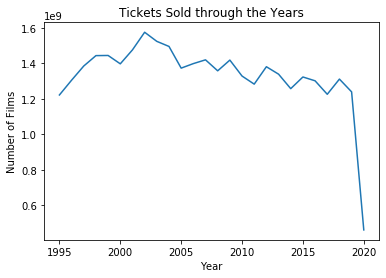

In [92]:
# Graph ticket Sold though the years
ax_ts = sns.lineplot(x='Year', y='Tickets Sold', data=df_tickets)
ax_ts.set_title('Tickets Sold through the Years')
ax_ts.set_ylabel('Number of Films')
;

#### Interpetation
- Even before the Pandemic, tickets sales have been steadily decreasing.  Looking into alternate distribution will likely be beneficial for the future especially with the future of theaters questionably after the pandemic.